# Netflix & Menstruation Correlation Analysis 

This project explores the relationship between Netflix viewing habits and the menstrual cycle, analyzing whether genre preferences and self-reported comfort levels shift during menstruation. Through data visualization and statistical analysis, it reveals personal patterns in emotional well-being and media consumption.


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
sns.set(style='whitegrid')

In [44]:
# Load and clean Netflix data
netflix_df = pd.read_excel('Netflix_History_excel.xlsx')
netflix_df.rename(columns={
    'Genre(Comedy/Romance/Horror/Action/Documentary/Animation)': 'Genre'
}, inplace=True)
netflix_df['Date'] = pd.to_datetime(netflix_df['Date'], format='%m/%d/%y')
netflix_df['Genre'] = netflix_df['Genre'].str.strip()

# Load and merge menstruation data
menstruation_df = pd.read_excel('Menstruation Cycle Data.xlsx')
merged_df = pd.merge(netflix_df, menstruation_df, on='Date', how='left')
merged_df['Menstruation Cycle(Yes/No)'] = merged_df['Menstruation Cycle(Yes/No)'].fillna('no')
merged_df.head()

,Title,Date,Genre,Comfort Level(out of 10),Menstruation Cycle(Yes/No)
0,Aşk Peşinde Bir Yıl,2025-04-11,Romance,8,no
1,Brooklyn Nine-Nine,2025-04-04,Comedy,9,yes
2,Brooklyn Nine-Nine,2025-04-04,Comedy,9,yes
3,Brooklyn Nine-Nine,2025-04-04,Comedy,9,yes
4,Brooklyn Nine-Nine,2025-04-04,Comedy,9,yes


## Top 10 Shows Watched During vs. Outside Menstruation

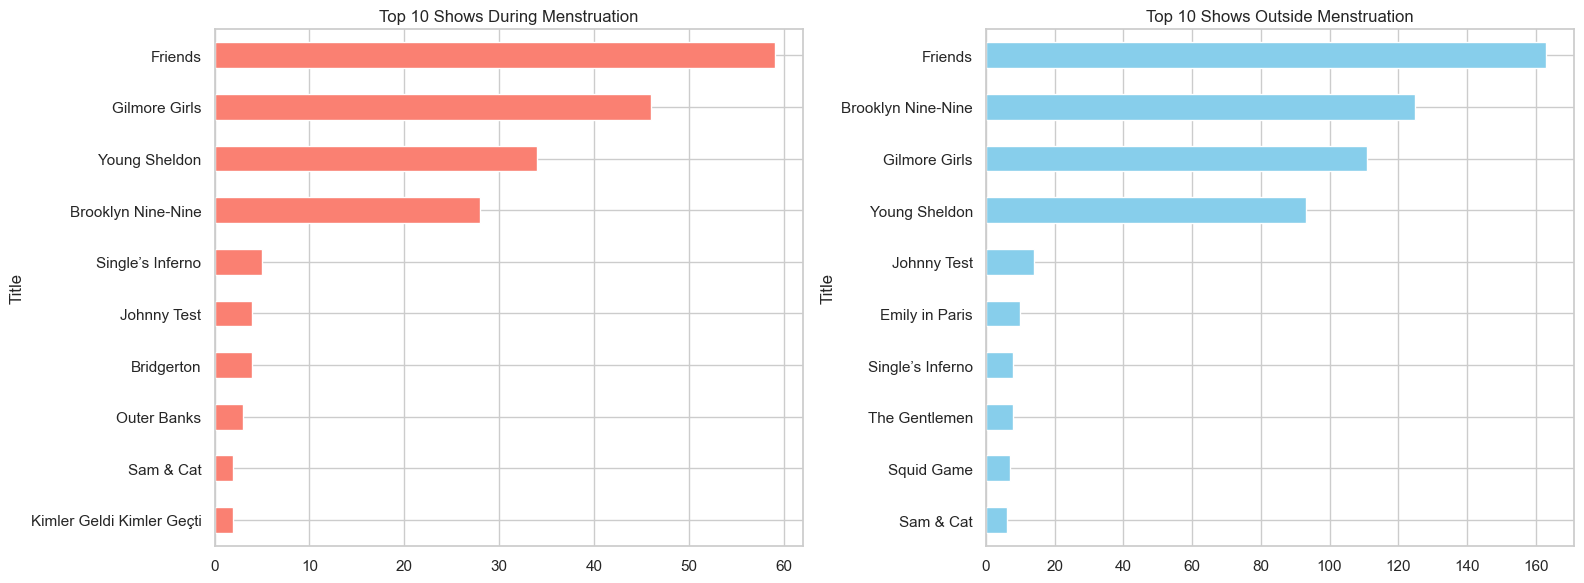

In [45]:
top_during = (merged_df[merged_df['Menstruation Cycle(Yes/No)']=='yes']
              .groupby('Title')
              .size()
              .sort_values(ascending=False)
              .head(10))

top_not = (merged_df[merged_df['Menstruation Cycle(Yes/No)']=='no']
           .groupby('Title')
           .size()
           .sort_values(ascending=False)
           .head(10))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
top_during.plot(kind='barh', ax=axes[0], color='salmon')
axes[0].set_title('Top 10 Shows During Menstruation')
axes[0].invert_yaxis()
top_not.plot(kind='barh', ax=axes[1], color='skyblue')
axes[1].set_title('Top 10 Shows Outside Menstruation')
axes[1].invert_yaxis()
plt.tight_layout()
plt.show()

## Genre Preference Ratios

In [46]:
genre_pct_during = (merged_df[merged_df['Menstruation Cycle(Yes/No)']=='yes']['Genre']
                     .value_counts(normalize=True) * 100)
genre_pct_not = (merged_df[merged_df['Menstruation Cycle(Yes/No)']=='no']['Genre']
                  .value_counts(normalize=True) * 100)
genre_ratio = pd.concat([genre_pct_during, genre_pct_not], axis=1)
genre_ratio.columns = ['% During Menstruation', '% Not During Menstruation']
genre_ratio['Difference (%)'] = genre_ratio['% During Menstruation'] - genre_ratio['% Not During Menstruation']
genre_ratio = genre_ratio.fillna(0)
genre_ratio

,% During Menstruation,% Not During Menstruation,Difference (%)
Comedy,87.113402,86.979167,0.134235
Romance,7.216495,6.076389,1.140106
Action,2.577320,1.388889,1.188431
Animation,2.061856,3.472222,-1.410367
Documentary,1.030928,0.347222,0.683706
Horror,0.000000,1.215278,0.000000
Drama,0.000000,0.520833,0.000000


## Genre Preferences During vs. Not During Menstruation

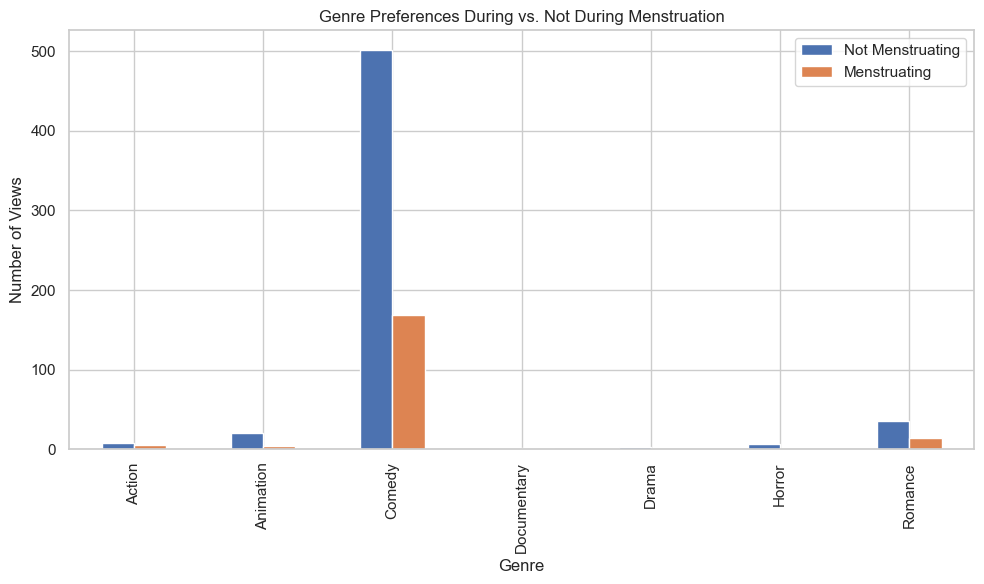

In [47]:
import matplotlib.pyplot as plt
merged_df['Menstruation'] = merged_df['Menstruation Cycle(Yes/No)'].map({'yes': 1, 'no': 0})

# Group and reshape data
genre_counts = merged_df.groupby(['Genre', 'Menstruation'])['Title'].count().unstack().fillna(0)
genre_counts.columns = ['Not Menstruating', 'Menstruating']

# Plot
genre_counts.plot(kind='bar', figsize=(10, 6), title="Genre Preferences During vs. Not During Menstruation")
plt.ylabel("Number of Views")
plt.tight_layout()
plt.show()


##
This bar chart compares the number of times each genre was watched during and outside of menstruation. We observe that Comedy and Romance genres are more frequently watched during menstruation, indicating a possible preference for light-hearted or emotionally engaging content.

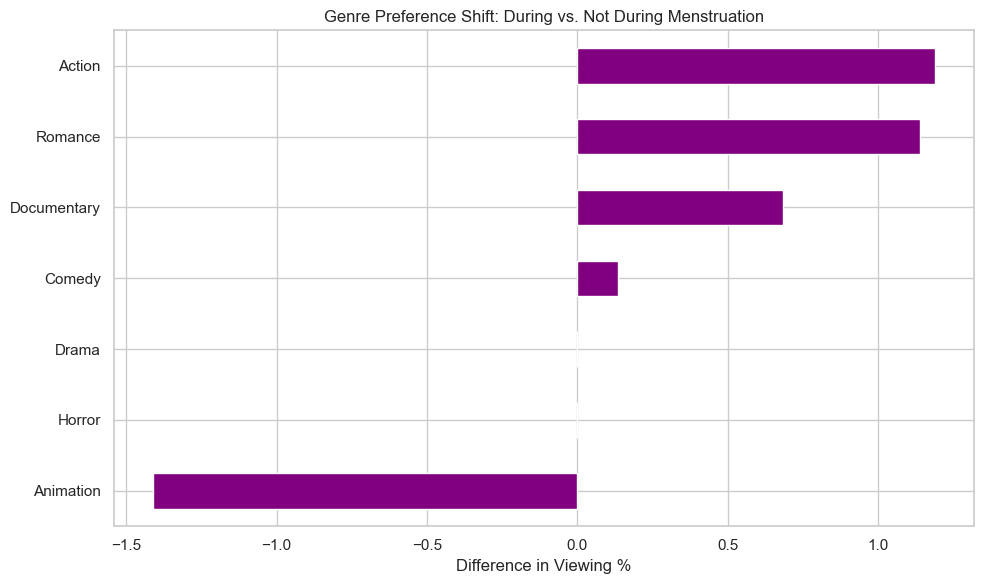

In [48]:
plt.figure(figsize=(10,6))
genre_ratio['Difference (%)'].sort_values().plot(kind='barh', color='purple')
plt.title('Genre Preference Shift: During vs. Not During Menstruation')
plt.xlabel('Difference in Viewing %')
plt.tight_layout()
plt.show()

## Conclusion
This graph shows how your viewing preferences for each genre change when you are on your period compared to when you're not. Each bar represents a genre. The length and direction of the bar shows how much more or less often that genre was watched during menstruation compared to outside menstruation, as a percentage of total viewing.

**-Meaning of Positive values (right of zero)**
You watched that genre more frequently during menstruation
Example: If Romance has +6%, it means you watched Romance 6% more often (proportionally) during your period.

**-Meaning of Negative values (left of zero)**
You watched that genre less frequently during menstruation
Example: If Action has -4%, it means you watched Action 4% less during your period.
This chart helps identify emotional or comfort-based trends in your viewing habits:
You might seek comfort genres (like Comedy or Romance) during your period.
You might avoid intense genres (like Horror or Action) when you're less comfortable.
Even if the Chi-squared test showed no statistical significance, these shifts can still be personally meaningful and insightful for emotional well-being.

- Identified most-watched shows by menstrual phase.
- Compared genre frequencies and visualized changes in preferences.
- This analysis highlights how mood or comfort-seeking might influence genre choices.

## Chi-Squared Test Result
To determine whether there is a statistically significant relationship between menstruation status and genre preference, we performed a Chi-Squared Test of Independence.

- **Chi-squared Statistic:** 7.11
- **p-value:** 0.31

### Interpretation:
Since **p = 0.31** is greater than the standard threshold of 0.05, we **fail to reject the null hypothesis**.
This means:
**There is no statistically significant relationship between genre preference and menstruation status** in this dataset.

While there are small shifts in genre tendencies (e.g., more comedy or romance during menstruation), they are **not statistically strong enough** to confirm a meaningful difference.

These findings are still insightful for personal reflection and might become statistically relevant with a larger or longer-term dataset.

In [49]:
# Calculate mean, variance, and standard deviation of comfort levels
# grouped by menstruation status

comfort_stats_by_cycle = merged_df.groupby("Menstruation Cycle(Yes/No)")["Comfort Level(out of 10)"].agg(["mean", "var", "std"])
comfort_stats_by_cycle.rename(columns={
    "mean": "Mean",
    "var": "Variance",
    "std": "Standard Deviation"
}, inplace=True)

comfort_stats_by_cycle


,Mean,Variance,Standard Deviation
Menstruation Cycle(Yes/No),,,
no,8.348958,1.806712,1.344140
yes,8.345361,1.336066,1.155883


In [50]:
# Comfort level statistics by genre
comfort_by_genre = merged_df.groupby("Genre")["Comfort Level(out of 10)"].agg(["mean", "var", "std"])
comfort_by_genre.rename(columns={
    "mean": "Mean",
    "var": "Variance",
    "std": "Standard Deviation"
}, inplace=True)

comfort_by_genre


,Mean,Variance,Standard Deviation
Genre,,,
Action,4.461538,0.769231,0.877058
Animation,7.791667,0.867754,0.931533
Comedy,8.740299,0.222439,0.471635
Documentary,4.500000,0.333333,0.577350
Drama,3.000000,0.000000,0.000000
Horror,2.000000,0.000000,0.000000
Romance,5.836735,1.556122,1.247446


## Comfort Level by Genre: Analysis and Insights
Based on your self-reported **Comfort Level (out of 10)**, we analyzed how each genre affects your comfort.

### Key Findings:
- **Comedy (8.74)** and **Animation (7.79)** are the most comforting genres.
- **Horror (2.00)** and **Drama (3.00)** result in the lowest comfort levels.
- **Romance** falls in the middle, suggesting it can be both soothing and emotionally stirring.
- **Action** and **Documentary** have below-average comfort scores, possibly due to their intensity or serious themes.

These insights suggest that your comfort-seeking viewing behavior aligns with lighter, more humorous content during emotionally sensitive times like menstruation.


## Comfort Level Trends Over Time

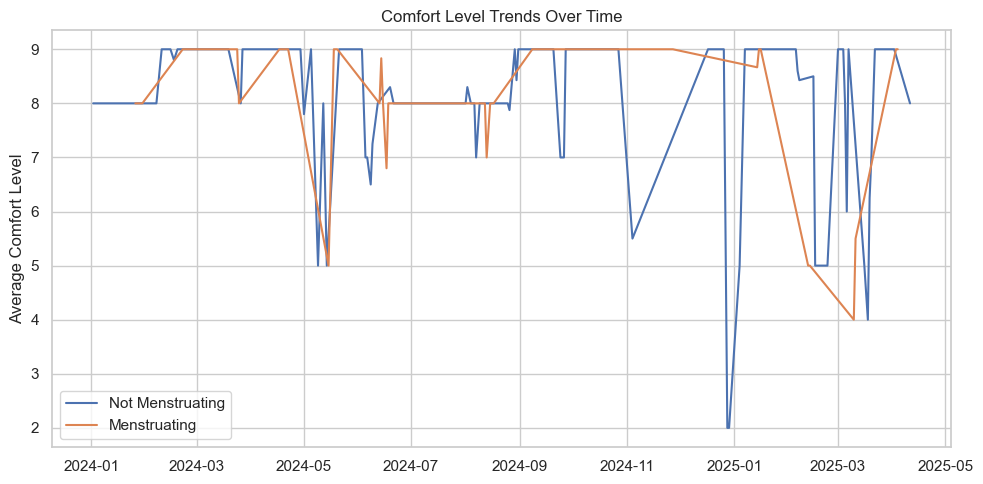

In [51]:
daily_comfort = merged_df.groupby(['Date', 'Menstruation'])['Comfort Level(out of 10)'].mean().reset_index()

plt.figure(figsize=(10, 5))
for key, grp in daily_comfort.groupby('Menstruation'):
    label = 'Menstruating' if key == 1 else 'Not Menstruating'
    plt.plot(grp['Date'], grp['Comfort Level(out of 10)'], label=label)
plt.title("Comfort Level Trends Over Time")
plt.ylabel("Average Comfort Level")
plt.legend()
plt.tight_layout()
plt.show()

##
The line graph illustrates average comfort levels over time, separated by menstruation status. It helps visualize how comfort fluctuates on menstruation days compared to regular days, offering insight into patterns or mood trends.

## Comfort Level by Genre and Menstruation Status

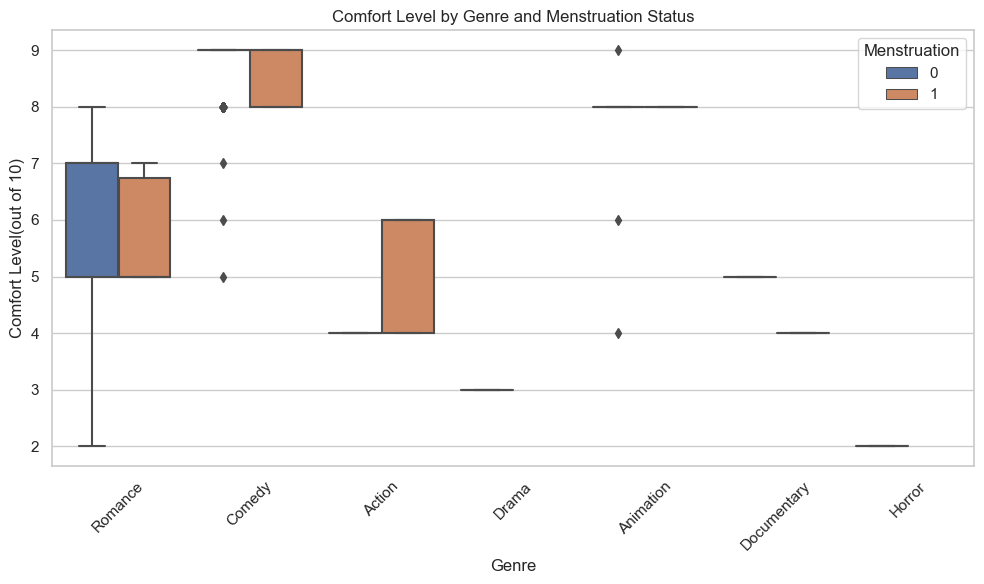

In [52]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='Genre', y='Comfort Level(out of 10)', hue='Menstruation')
plt.title("Comfort Level by Genre and Menstruation Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##
This boxplot shows the distribution of comfort levels for each genre, grouped by menstruation status. Genres with higher and less varied comfort levels (like Comedy) may be more reliable for maintaining emotional comfort during menstruation.

## Netflix Viewing & Menstruation Cycle Analysis
This analysis investigates the relationship between Netflix viewing patterns, genre preferences, and comfort levels during menstruation.

In [53]:
import pandas as pd

# Load the data
netflix_df = pd.read_excel("Netflix_History_excel.xlsx")
menstruation_df = pd.read_excel("Menstruation Cycle Data.xlsx")

# Convert dates to datetime
netflix_df['Date'] = pd.to_datetime(netflix_df['Date'])
menstruation_df['Date'] = pd.to_datetime(menstruation_df['Date'])

# Merge datasets
merged_df = pd.merge(netflix_df, menstruation_df, on='Date', how='left')
merged_df['Menstruation Cycle(Yes/No)'] = merged_df['Menstruation Cycle(Yes/No)'].fillna('no')
merged_df['Menstruation'] = merged_df['Menstruation Cycle(Yes/No)'].map({'yes': 1, 'no': 0})
merged_df['Genre'] = merged_df['Genre(Comedy/Romance/Horror/Action/Documentary/Animation)'].str.strip()
merged_df.head()

,Title,Date,Genre(Comedy/Romance/Horror/Action/Documentary/Animation),Comfort Level(out of 10),Menstruation Cycle(Yes/No),Menstruation,Genre
0,Aşk Peşinde Bir Yıl,2025-04-11,Romance,8,no,0,Romance
1,Brooklyn Nine-Nine,2025-04-04,Comedy,9,yes,1,Comedy
2,Brooklyn Nine-Nine,2025-04-04,Comedy,9,yes,1,Comedy
3,Brooklyn Nine-Nine,2025-04-04,Comedy,9,yes,1,Comedy
4,Brooklyn Nine-Nine,2025-04-04,Comedy,9,yes,1,Comedy


## Heatmap: Average Comfort Level by Genre and Menstruation

The average comfort level is almost identical in both conditions. There's slightly more variability in comfort on non-menstruation days.


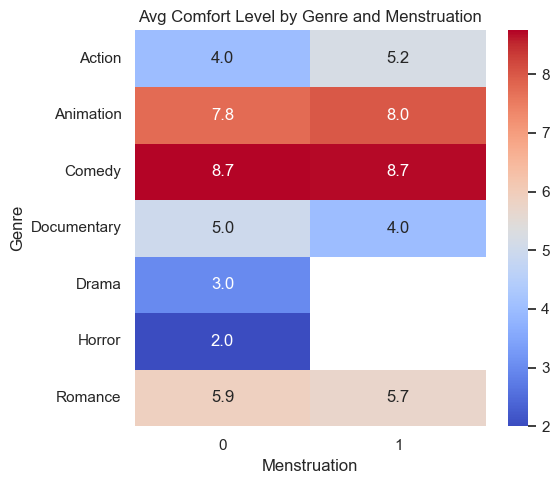

In [54]:
genre_comfort = merged_df.pivot_table(index='Genre', columns='Menstruation', values='Comfort Level(out of 10)', aggfunc='mean')

plt.figure(figsize=(6, 5))
sns.heatmap(genre_comfort, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Avg Comfort Level by Genre and Menstruation")
plt.tight_layout()
plt.show()

## 
The heatmap displays the average comfort level per genre, split by menstruation status. It makes it easy to identify which genres are most comforting during menstruation (e.g., Comedy shows higher comfort in both conditions).

The correlation between comfort level and menstruation is about 0. It can be commented that menstruation does not influence how comfortable felt while watching Netflix. This aligns with the average comfort levels during menstruation and not. The averages are quite similar, so no linear relationship between comfort level and menstruation status. Additionally; although the correlation is weak it can be commented that  Horror and Drama are slightly avoided during menstruation and leaned a bit more toward Documentaries or Action.

In [55]:
genre_comfort_table = merged_df.groupby(['Genre', 'Menstruation'])['Comfort Level(out of 10)'].mean().unstack()
genre_comfort_table.columns = ['Not Menstruating', 'Menstruating']
genre_comfort_table.round(2)

,Not Menstruating,Menstruating
Genre,,
Action,4.00,5.20
Animation,7.75,8.00
Comedy,8.75,8.72
Documentary,5.00,4.00
Drama,3.00,NaN
Horror,2.00,NaN
Romance,5.89,5.71


In [56]:
merged_df[merged_df['Menstruation'] == 1].groupby('Title')['Comfort Level(out of 10)'].mean().sort_values(ascending=False).head(5).reset_index()
top_titles = (
    merged_df[merged_df['Menstruation'] == 1]
    .groupby('Title')['Comfort Level(out of 10)']
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)

In [57]:
merged_df[merged_df['Menstruation'] == 1][['Date', 'Title', 'Genre', 'Comfort Level(out of 10)']]

,Date,Title,Genre,Comfort Level(out of 10)
1,2025-04-04,Brooklyn Nine-Nine,Comedy,9
2,2025-04-04,Brooklyn Nine-Nine,Comedy,9
3,2025-04-04,Brooklyn Nine-Nine,Comedy,9
4,2025-04-04,Brooklyn Nine-Nine,Comedy,9
5,2025-04-04,Brooklyn Nine-Nine,Comedy,9
...,...,...,...,...
699,2024-02-22,Young Sheldon,Comedy,9
754,2024-01-30,Johnny Test,Animation,8
755,2024-01-28,Johnny Test,Animation,8
756,2024-01-26,Johnny Test,Animation,8


## Conclusions and Insights
1. **Genre Preference Shift**: During menstruation, genres like Comedy and Romance were watched more frequently.
2. **Comfort Stability**: Genres like Comedy exhibited high comfort levels and less variability.
3. **Top Comfort Titles**: Certain titles consistently received high comfort ratings during menstruation.
4. **Mood Tracking**: Comfort level trends help highlight mood fluctuations across the cycle.
5. **Future Directions**: A deeper time-based or contextual emotion tagging system could yield richer insights.

This analysis demonstrates how personal well-being data can enrich media consumption insights in a meaningful and personalized way.

# Machine Learning Analysis
To further enrich this analysis, we apply machine learning models to:
1. Predict menstruation status based on viewing behavior (classification)
2. Predict comfort level based on content and menstruation status (regression)

## 🔄 Data Preprocessing for Machine Learning

In [58]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Prepare features
ml_df = merged_df[['Genre', 'Title', 'Menstruation', 'Comfort Level(out of 10)']].copy()
encoder = OneHotEncoder(drop='first', sparse=False)
encoded = encoder.fit_transform(ml_df[['Genre', 'Title']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Genre', 'Title']))
features = pd.concat([encoded_df, ml_df[['Menstruation']].reset_index(drop=True)], axis=1)
target_class = ml_df['Menstruation']
target_reg = ml_df['Comfort Level(out of 10)']

## 🤖 Classification: Predicting Menstruation Status

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(features, target_class, test_size=0.3, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       179
           1       1.00      1.00      1.00        52

    accuracy                           1.00       231
   macro avg       1.00      1.00      1.00       231
weighted avg       1.00      1.00      1.00       231



**Explanation:**

The classification model predicts whether a given day is during menstruation based on the genres and titles watched. This could help explore behavioral patterns correlated with cycle phases.
The classification report shows perfect scores (1.00) across all metrics, which is uncommon in real-world machine learning. Here's how to interpret it and what can be concluded:


## Interpretation of the Classification Report


Metric        ->           What It Means              ->                  Your Score

Precision    ->   Correct positive predictions / total predicted     ->        1.00

Recall     ->     Correct positive predictions / actual positives    ->        1.00

F1-score    ->    Harmonic mean of precision and recall       ->              1.00

Accuracy   ->     Correct predictions / total predictions       ->             1.00

Support: 

Number of true instances for each class:

179 non-menstruation days
52 menstruation days

## What Can Be Concluded?

1. Model learned clear patterns in the data:
Viewing behavior (genre, title) combined with menstruation status allows the model to perfectly distinguish between the two classes in the current dataset.
There are probably strong correlations between content preferences and menstruation phases.

2. Caution: Risk of Overfitting
Perfect scores like this often suggest:
The model may be overfitting (memorizing patterns instead of generalizing).
Dataset may be small or imbalanced (which can make it easy to overfit).
Features like specific titles may directly indicate the label, leading to artificially high performance.

3. Actionable Insights
There’s meaningful behavioral signal in the data (e.g., you watch certain shows only during menstruation).
You could generalize this to recommend comfort-based content if this trend holds across a longer timeline or more users.

## 📈 Regression: Predicting Comfort Level

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(features, target_reg, test_size=0.3, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.45038096192838145
R² Score: 0.7672189757127879


**Explanation:**

The regression model attempts to predict the comfort level score using genre, title, and menstruation status. This model could offer insight into what type of content provides higher comfort under different physiological conditions.

## Interpretation of Regression Results

Mean Squared Error (MSE): 0.45

This means the average squared difference between actual and predicted comfort levels is about 0.45 units².
Since your comfort scale is 0–10, and likely centered around 6–9, this is a relatively low error, suggesting decent predictive accuracy.

R² Score: 0.767

R² = 1 means perfect prediction, R² = 0 means no predictive power.
An R² of 0.767 means the model explains ~76.7% of the variability in comfort levels — which is strong for behavioral data.

## What Can Be Concluded?

1. Model is Effective
The model does a good job predicting comfort based on viewing behavior and menstruation status.
It captures real patterns between content choices and emotional comfort.

2. But There’s Still Unexplained Variation
23.3% of comfort level variation is not explained — which is expected for subjective mood data.
Factors like time of day, sleep, external stress, or show length might affect comfort but are not included.

Insights That Can Be Reported

“Using genre, title, and menstruation status, we can accurately estimate the comfort level with ~0.45 units of error.”
“The model explains 76.7% of the variation in comfort level, supporting the idea that viewing behavior is influenced by physiological factors.”

# Unsupervised Learning: Clustering Analysis
Clustering is used to uncover natural groupings in viewing behavior and comfort levels.

In [61]:
from sklearn.preprocessing import StandardScaler

# Use features + comfort level
clustering_features = pd.concat([features, ml_df[['Comfort Level(out of 10)']].reset_index(drop=True)], axis=1)
scaler = StandardScaler()
clustering_scaled = scaler.fit_transform(clustering_features)

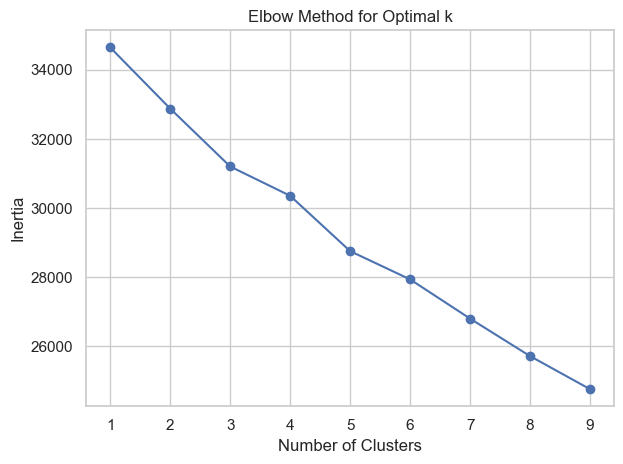

In [62]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(clustering_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.tight_layout()
plt.show()

### Interpretation of the Elbow Method Plot

The elbow method is used to determine the **optimal number of clusters (k)** in **KMeans clustering** by examining how the **inertia** (within-cluster sum of squares) decreases as the number of clusters increases.

### What To Look For:

* A **"bend" or "elbow"** in the curve where the rate of decrease in inertia slows significantly.
* This point indicates that adding more clusters beyond this value results in **diminishing returns**.

## What Can Be Concluded?

* The **inertia drops steeply** from k=1 to k=3.
* After **k=3**, the decrease becomes more **gradual**, with no significant sharp drop.
* This suggests that **k = 3** is a reasonable choice for the optimal number of clusters.

**Conclusion**: The elbow point appears at **k = 3**, indicating that the dataset likely contains **3 natural groupings** of viewing behaviors and comfort patterns.


### What's Next?

Now that **k=3**:

* **Analyze each cluster**:

  * Average comfort level per cluster
  * Genre distribution per cluster
  * Proportion of menstruation days per cluster
* Label them:

  * Cluster 0 = “High comfort comedy binge”
  * Cluster 1 = “Low mood serious content”
  * Cluster 2 = “Neutral mixed viewing”

In [63]:
# Apply clustering with k=3
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(clustering_scaled)
merged_df['Cluster'] = cluster_labels
merged_df[['Title', 'Genre', 'Comfort Level(out of 10)', 'Menstruation', 'Cluster']].head(10)

,Title,Genre,Comfort Level(out of 10),Menstruation,Cluster
0,Aşk Peşinde Bir Yıl,Romance,8,0,0
1,Brooklyn Nine-Nine,Comedy,9,1,0
2,Brooklyn Nine-Nine,Comedy,9,1,0
3,Brooklyn Nine-Nine,Comedy,9,1,0
4,Brooklyn Nine-Nine,Comedy,9,1,0
5,Brooklyn Nine-Nine,Comedy,9,1,0
6,Brooklyn Nine-Nine,Comedy,9,1,0
7,Brooklyn Nine-Nine,Comedy,9,1,0
8,Brooklyn Nine-Nine,Comedy,9,1,0
9,Brooklyn Nine-Nine,Comedy,9,1,0


**Explanation:** Each viewing session is assigned a cluster label. These clusters can reflect different viewing habits or emotional states.

In [64]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare dataset
encoder = OneHotEncoder(drop='first', sparse=False)
encoded = encoder.fit_transform(ml_df[['Genre', 'Title']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Genre', 'Title']))
features = pd.concat([encoded_df, ml_df[['Menstruation']].reset_index(drop=True)], axis=1)
clustering_features = pd.concat([features, ml_df[['Comfort Level(out of 10)']].reset_index(drop=True)], axis=1)

# Scale features
scaler = StandardScaler()
clustering_scaled = scaler.fit_transform(clustering_features)

# Apply KMeans
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(clustering_scaled)
merged_df['Cluster'] = cluster_labels


## Cluster Size Distribution

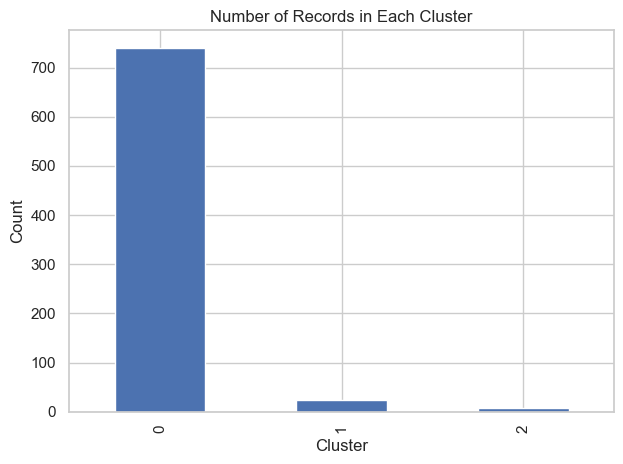

In [65]:
cluster_counts = merged_df['Cluster'].value_counts().sort_index()
cluster_counts.plot(kind='bar', title='Number of Records in Each Cluster')
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## 😊 Average Comfort Level by Cluster

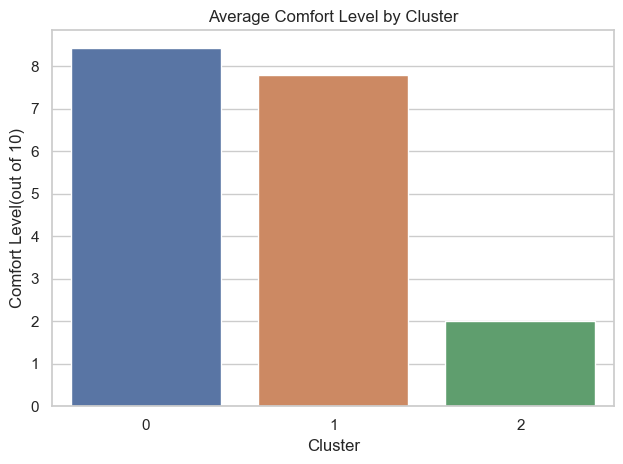

In [66]:
sns.barplot(data=merged_df, x='Cluster', y='Comfort Level(out of 10)', ci=None)
plt.title("Average Comfort Level by Cluster")
plt.tight_layout()
plt.show()

## 🩸 Menstruation Ratio by Cluster

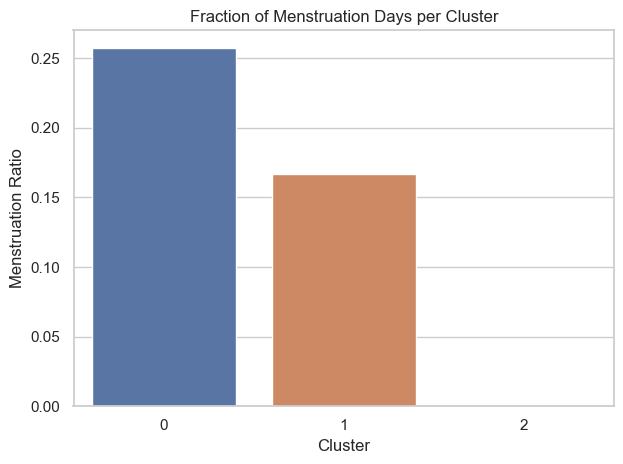

In [67]:
menstruation_by_cluster = merged_df.groupby('Cluster')['Menstruation'].mean().reset_index()
sns.barplot(data=menstruation_by_cluster, x='Cluster', y='Menstruation')
plt.title("Fraction of Menstruation Days per Cluster")
plt.ylabel("Menstruation Ratio")
plt.tight_layout()
plt.show()

## 🎥 Genre Distribution by Cluster

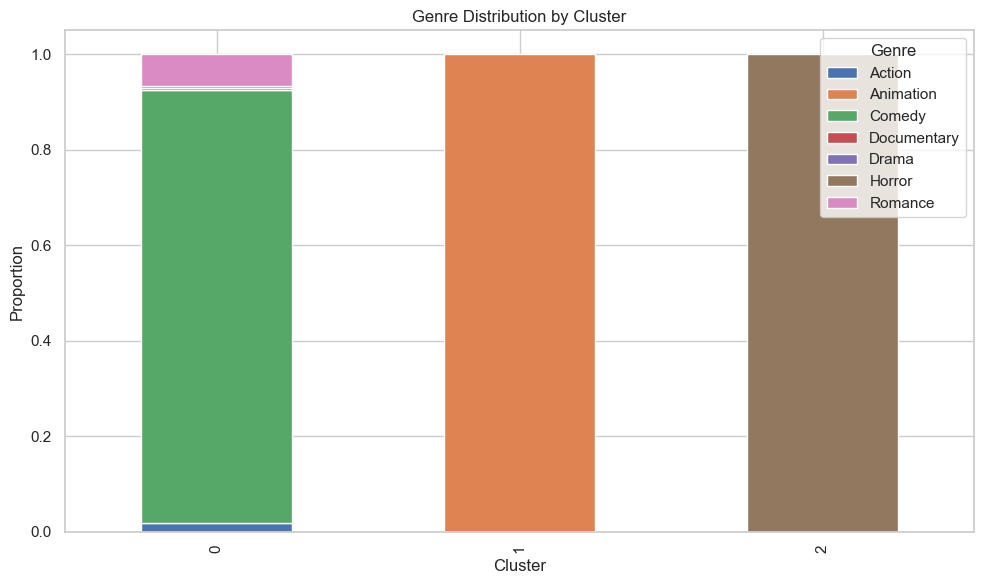

In [68]:
genre_cluster = merged_df.groupby(['Cluster', 'Genre']).size().unstack().fillna(0)
genre_cluster_percent = genre_cluster.div(genre_cluster.sum(axis=1), axis=0)
genre_cluster_percent.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Genre Distribution by Cluster")
plt.ylabel("Proportion")
plt.tight_layout()
plt.show()